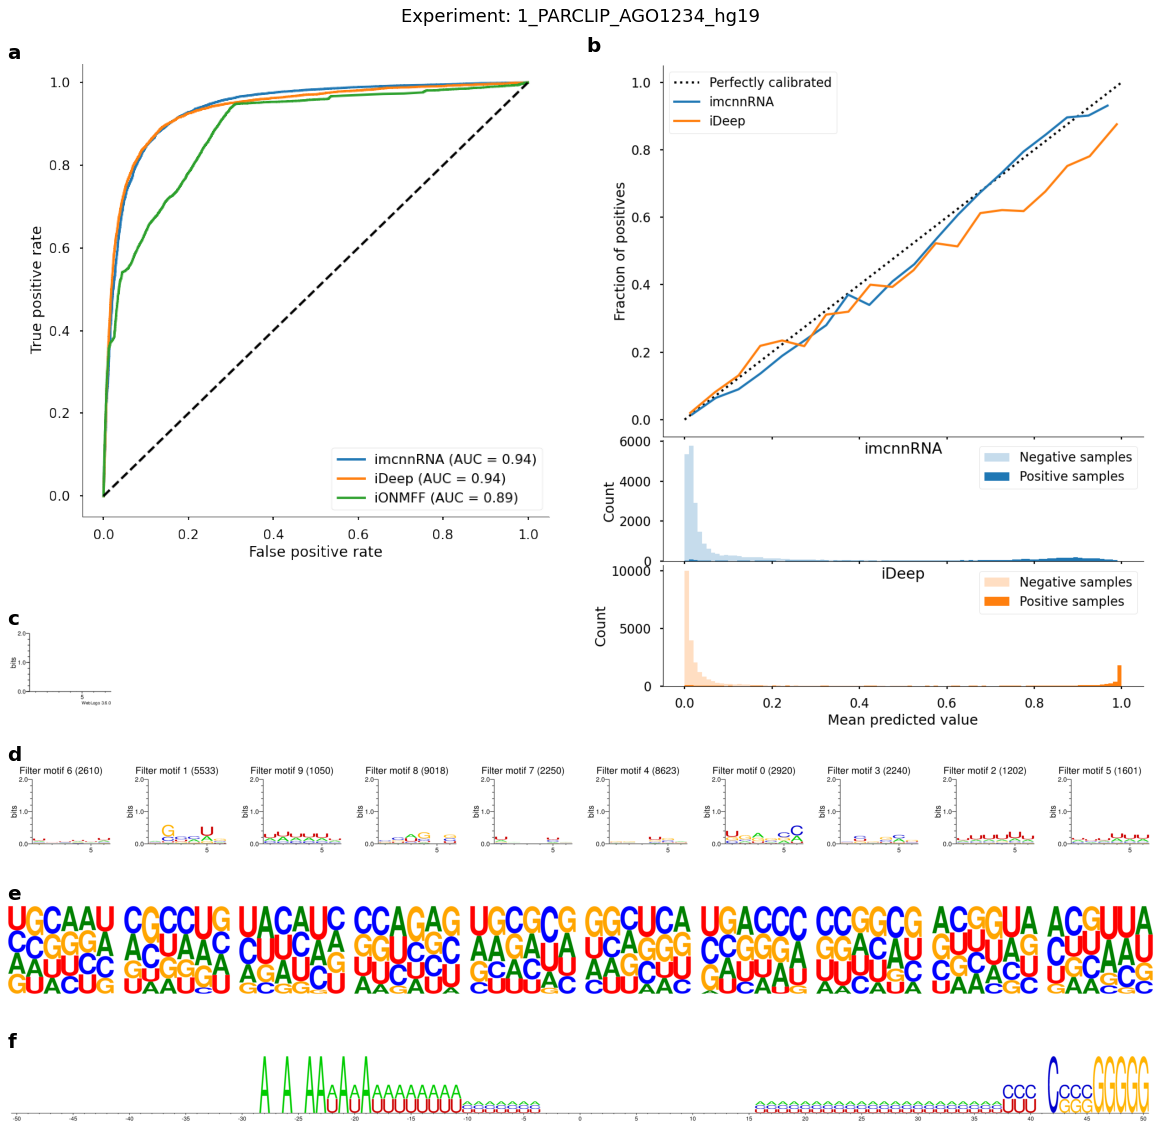

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import numpy as np
from pathlib import Path

SET_NUMBER = 0
AUC_ORDER = {
    "1_PARCLIP_AGO1234_hg19": [6, 1, 9, 8, 7, 4, 0, 3, 2],
    "2_PARCLIP_AGO2MNASE_hg19": [3, 0, 6, 9, 7, 8, 4, 5],
    "3_HITSCLIP_Ago2_binding_clusters": [0, 9, 5, 3, 2, 1, 6, 7, 4],
    "4_HITSCLIP_Ago2_binding_clusters_2": [4, 1, 3, 9, 5, 0, 6, 2, 7, 8],
    "5_CLIPSEQ_AGO2_hg19": [9, 5, 1, 3, 6, 4, 2, 0, 7],
    "6_CLIP-seq-eIF4AIII_1": [2, 0, 3, 7, 5, 1, 4, 9, 8],
    "7_CLIP-seq-eIF4AIII_2": [6, 4, 5, 2, 1, 3, 8, 7, 0, 9],
    "8_PARCLIP_ELAVL1_hg19": [3, 1, 8, 7, 2, 6, 9, 0, 5, 4],
    "9_PARCLIP_ELAVL1MNASE_hg19": [8, 1, 4, 2, 9, 5, 6, 3, 0, 7],
    "10_PARCLIP_ELAVL1A_hg19": [0, 4, 1, 8, 2, 6, 5, 7, 3, 9],
    "12_PARCLIP_EWSR1_hg19": [6, 9, 3, 0, 1, 5, 2, 4, 8, 7],
    "13_PARCLIP_FUS_hg19": [1, 8, 2, 9, 5, 0, 4, 7, 6, 3],
    "14_PARCLIP_FUS_mut_hg19": [6, 7, 5, 9, 2, 4, 1, 0, 3],
    "15_PARCLIP_IGF2BP123_hg19": [8, 0, 1, 5, 3, 2, 7, 6, 4, 9],
    "16_ICLIP_hnRNPC_Hela_iCLIP_all_clusters": [4, 7, 1, 0, 9, 5, 8, 6, 3],
    "17_ICLIP_HNRNPC_hg19": [3, 9, 5, 2, 1, 0, 6, 8, 7, 4],
    "18_ICLIP_hnRNPL_Hela_group_3975_all-hnRNPL-Hela-hg19_sum_G_hg19--ensembl59_from_2337-2339-741_bedGraph-cDNA-hits-in-genome": [0, 6, 9, 4, 2, 7, 8, 5, 3, 1],
    "19_ICLIP_hnRNPL_U266_group_3986_all-hnRNPL-U266-hg19_sum_G_hg19--ensembl59_from_2485_bedGraph-cDNA-hits-in-genome": [0, 9, 5, 4, 3, 7, 2, 8, 1, 6],
    "20_ICLIP_hnRNPlike_U266_group_4000_all-hnRNPLlike-U266-hg19_sum_G_hg19--ensembl59_from_2342-2486_bedGraph-cDNA-hits-in-genome": [9, 0, 5, 1, 6, 4, 3, 2, 7, 8],
    "21_PARCLIP_MOV10_Sievers_hg19": [5, 8, 6, 0, 2, 3, 7, 4, 9],
    "22_ICLIP_NSUN2_293_group_4007_all-NSUN2-293-hg19_sum_G_hg19--ensembl59_from_3137-3202_bedGraph-cDNA-hits-in-genome": [4, 2, 7, 0, 5, 8, 3, 6, 1],
    "23_PARCLIP_PUM2_hg19": [5, 3, 9, 2, 0, 1, 4, 6, 8],
    "24_PARCLIP_QKI_hg19": [6, 1, 0, 8, 4, 7, 5, 2, 3, 9],
    "25_CLIPSEQ_SFRS1_hg19": [3, 0, 9, 4, 7, 2, 6, 5, 1],
    "26_PARCLIP_TAF15_hg19": [1, 3, 0, 2, 9, 6, 7, 8, 5],
    "27_ICLIP_TDP43_hg19": [7, 4, 0, 8, 1, 3, 2, 5, 9, 6],
    "28_ICLIP_TIA1_hg19": [5, 2, 8, 0, 3, 7, 4, 9, 1, 6],
    "29_ICLIP_TIAL1_hg19": [8, 9, 5, 2, 0, 1, 7, 4, 6, 3],
    "30_ICLIP_U2AF65_Hela_iCLIP_ctrl_all_clusters": [1, 0, 2, 8, 5, 6, 9, 3, 7, 4],
    "31_ICLIP_U2AF65_Hela_iCLIP_ctrl+kd_all_clusters": [7, 2, 4, 0, 6, 9, 1, 8, 3]
}

def plot_aggregated(protein, order):
    tens = [i for i in range(10)]
    missing = list(set(tens) - set(order))

    fig = plt.figure(figsize=(16, 16), constrained_layout=True)
    gs = fig.add_gridspec(8,10)

    fig.suptitle(f"Experiment: {protein}", fontsize=18)

    ax = fig.add_subplot(gs[:5, 5:])
    img = mpimg.imread(f"results/calibration_curves2/{protein}_calibration_curve.png")
    ax.imshow(img)
    ax.set_title(f"b", loc="left", fontweight="bold", fontsize=20)

    ax = fig.add_subplot(gs[:4, :5])
    img = mpimg.imread(f"figures/ROC/{protein}.png")
    img = img[89:, 0:680, :]
    ax.imshow(img)
    ax.set_title(f"a", loc="left", fontweight="bold", fontsize=20)


    ax = fig.add_subplot(gs[4, 0])
    img = mpimg.imread(f"results/set_{SET_NUMBER}/{protein}/saliency.png")
    ax.set_title(f"c", loc="left", fontweight="bold", fontsize=20)
    ax.imshow(img)


    ax = fig.add_subplot(gs[-1, :])
    img = mpimg.imread(f"results/set_{SET_NUMBER}/{protein}/max_activation3.png")
    ax.imshow(img)
    ax.set_title(f"f", loc="left", fontweight="bold", fontsize=20)

    for grid_num, filter in enumerate(order + missing):
        activation_fname = f"test_motifs/{protein}/motif{filter}.png"
        if Path(activation_fname).is_file():
            ax = fig.add_subplot(gs[-3, grid_num])
            img = mpimg.imread(activation_fname)
            ax.imshow(img)
        if grid_num == 0:
            ax.set_title(f"d", loc="left", fontweight="bold", fontsize=20)
            
        ax2 = fig.add_subplot(gs[-2, grid_num])
        img2 = mpimg.imread(f"filters_rna_png/KMER_{protein}_{filter}.png")
        ax2.imshow(img2)

        if grid_num == 0:
            ax2.set_title(f"e", loc="left", fontweight="bold", fontsize=20)

    for ax in fig.get_axes():
        ax.set_axis_off()
    plt.savefig("test.png")
    plt.show()


plot_aggregated("1_PARCLIP_AGO1234_hg19", AUC_ORDER["1_PARCLIP_AGO1234_hg19"])
plt.close()

In [11]:

from IPython.display import Latex

protein_names = ['1 Ago/EIF', '2 Ago2-MNase', '3 Ago2-1', '4 Ago2-2', '5 Ago2', '6 eIF4AIII-1', '7 eIF4AIII-2', '8 ELAVL1-1', '9 ELAVL1-MNase', '10 ELAVL1A', '11 ELAVL1-2', '12 ESWR1', '13 FUS', '14 Mut FUS', '15 IGFBP1-3', '16 hnRNPC-1', '17 hnRNPC-2', '18 hnRNPL-1', '19 hnRNPL-2', '20 hnRNPL-like', '21 MOV10', '22 Nsun2', '23 PUM2', '24 QKI', '25 SRSF1' , '26 TAF15', '27 TDP-43', '28 TIA1', '29 TIAL1', '30 U2AF2', '31 U2AF2(KD)']
protein_list = ["1_PARCLIP_AGO1234_hg19", "2_PARCLIP_AGO2MNASE_hg19","3_HITSCLIP_Ago2_binding_clusters","4_HITSCLIP_Ago2_binding_clusters_2","5_CLIPSEQ_AGO2_hg19", "6_CLIP-seq-eIF4AIII_1","7_CLIP-seq-eIF4AIII_2","8_PARCLIP_ELAVL1_hg19","9_PARCLIP_ELAVL1MNASE_hg19", "10_PARCLIP_ELAVL1A_hg19", "10_PARCLIP_ELAVL1A_hg19", "12_PARCLIP_EWSR1_hg19", "13_PARCLIP_FUS_hg19", "14_PARCLIP_FUS_mut_hg19", "15_PARCLIP_IGF2BP123_hg19", "16_ICLIP_hnRNPC_Hela_iCLIP_all_clusters", "17_ICLIP_HNRNPC_hg19", "18_ICLIP_hnRNPL_Hela_group_3975_all-hnRNPL-Hela-hg19_sum_G_hg19--ensembl59_from_2337-2339-741_bedGraph-cDNA-hits-in-genome", "19_ICLIP_hnRNPL_U266_group_3986_all-hnRNPL-U266-hg19_sum_G_hg19--ensembl59_from_2485_bedGraph-cDNA-hits-in-genome", "20_ICLIP_hnRNPlike_U266_group_4000_all-hnRNPLlike-U266-hg19_sum_G_hg19--ensembl59_from_2342-2486_bedGraph-cDNA-hits-in-genome", "21_PARCLIP_MOV10_Sievers_hg19", "22_ICLIP_NSUN2_293_group_4007_all-NSUN2-293-hg19_sum_G_hg19--ensembl59_from_3137-3202_bedGraph-cDNA-hits-in-genome", "23_PARCLIP_PUM2_hg19", "24_PARCLIP_QKI_hg19", "25_CLIPSEQ_SFRS1_hg19","26_PARCLIP_TAF15_hg19", "27_ICLIP_TDP43_hg19", "28_ICLIP_TIA1_hg19", "29_ICLIP_TIAL1_hg19", "30_ICLIP_U2AF65_Hela_iCLIP_ctrl_all_clusters", "31_ICLIP_U2AF65_Hela_iCLIP_ctrl+kd_all_clusters"]

def makeplot(figname, figlabel, figcaption):
    strLatex=r"""\subsection{%s}
    \begin{figure}[h!]
        \begin{center}
            \includegraphics[width=\textwidth]{/%s}
            \caption{%s}
            \label{sf:%s}
        \end{center}
    \end{figure}
    \clearpage"""%(figlabel.split(" ")[1], figname, figcaption, figlabel) 
    return display(Latex(strLatex))

for protein, name in zip(protein_list, protein_names):
    fig_text = [
        f"Aggregated plots for {name.split(' ')[1]}. (a) Area under ROC curve analysis of iDeep, iONMF and mcBind. (b) Calibration curves for iDeep and mcBind. For each of the "
        "two models the distribution of predicted values is shown below. (c) Sequence logo based on most salient regions. (d) Sequence motifs based on filter activation. Filters are ordered "
        "by the impact on AUC when this filter is omitted. The number of times each filter was activated is written in parentheses. (e) Visualisation of filter weights. (f) Artificial sequence "
        "that achieves the maximum activation."
    ]
    makeplot(f"{protein}.png", name, fig_text[0])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>